In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline


df = pd.read_csv("rd4dd_census_clean.csv")
df.columns
y = df['OP_time'].values
X = df.drop(['OP_time'], axis = 1)


Index(['District', 'Latitude', 'Longitude', 'Shop_type', 'OP_time',
       'Ultra_food', 'Per_ultra', 'Ready_food', 'CERE', 'WHITE', 'VITAMINV',
       'VITAMINRT', 'DARKV', 'OTHERV', 'VITAMINF', 'OTHERF', 'ORGANM',
       'FLESHM', 'FISH', 'INSECTSV', 'EGGS', 'MILK', 'NUTS', 'LEGUM', 'OILF',
       'SWEETS', 'SAB', 'OUT_CER'],
      dtype='object')

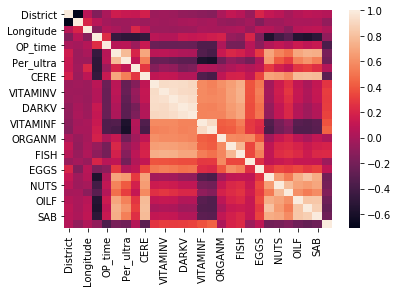

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt

replace = {1:1,2:1,3:2,4:2}

y_new = pd.Series([replace.get(x,x) for x in y], name = "OP_time")

df_3_1 = pd.merge(X, y_new, right_index = True, left_index = True)

corrMatrix = df.corr()
#print(corrMatrix)

sn.heatmap(corrMatrix, annot=False)
plt.show()

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=15, step=1)
selector = selector.fit(X, y)
rankings = pd.Series(selector.ranking_, name = 'ranking')
names = pd.Series(X.columns, name = 'name')

combined = pd.merge(names, rankings, left_index = True, right_index = True)
print("Top 5 features selected from RFE")
print(combined[combined['ranking']==1])

C:\Users\jocel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Top 5 features selected from RFE
          name  ranking
0     District        1
3    Shop_type        1
6   Ready_food        1
7         CERE        1
8        WHITE        1
11       DARKV        1
14      OTHERF        1
15      ORGANM        1
18    INSECTSV        1
20        MILK        1
21        NUTS        1
22       LEGUM        1
23        OILF        1
25         SAB        1
26     OUT_CER        1


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [7]:
X_scaler = StandardScaler()

In [21]:
from sklearn.metrics import r2_score

rfe_selection = combined[combined['ranking']==1]['name'].values
X_train_c = X_train[rfe_selection]
X_test_c = X_test[rfe_selection]
X_train_c = X_scaler.fit_transform(X_train_c)
X_test_c = X_scaler.transform(X_test_c)

mod_c = MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_c, y_train)
print("\nRFE Selected Predictors, Test R^2 Score")
print(r2_score(y_test, mod_c.predict(X_test_c)))


RFE Selected Predictors, Test R^2 Score
0.45652303260664473
